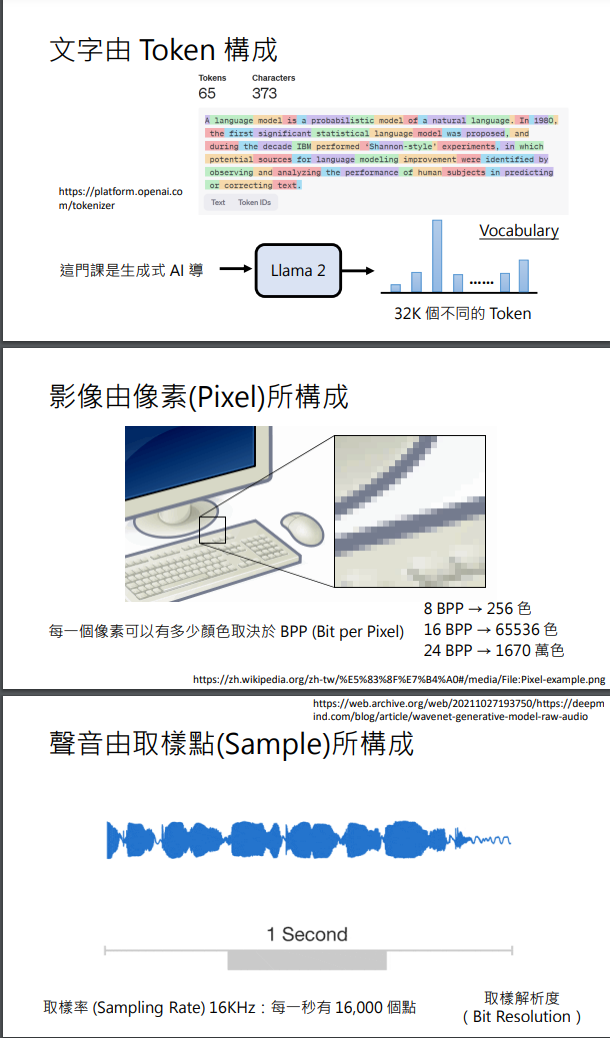

生成式人工智慧是产生复杂的有结构的物件。复杂是指近乎无法穷举，有结构是指由有限的基本单位构成
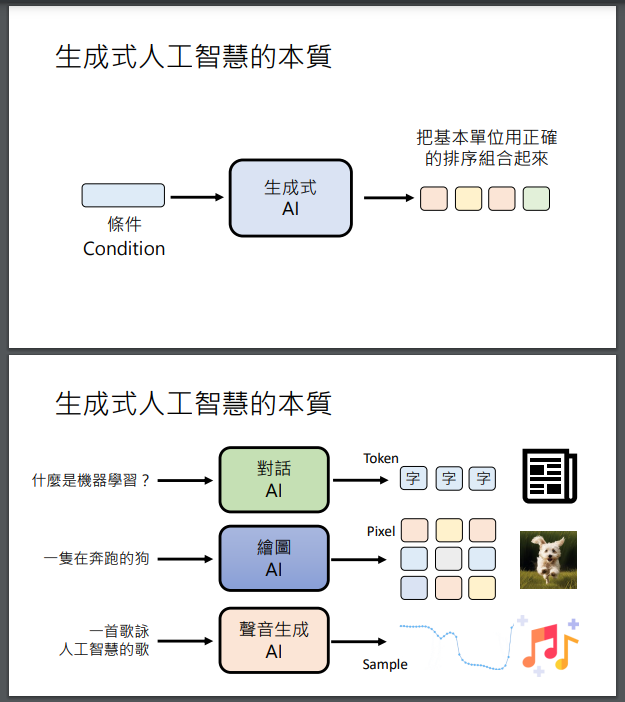
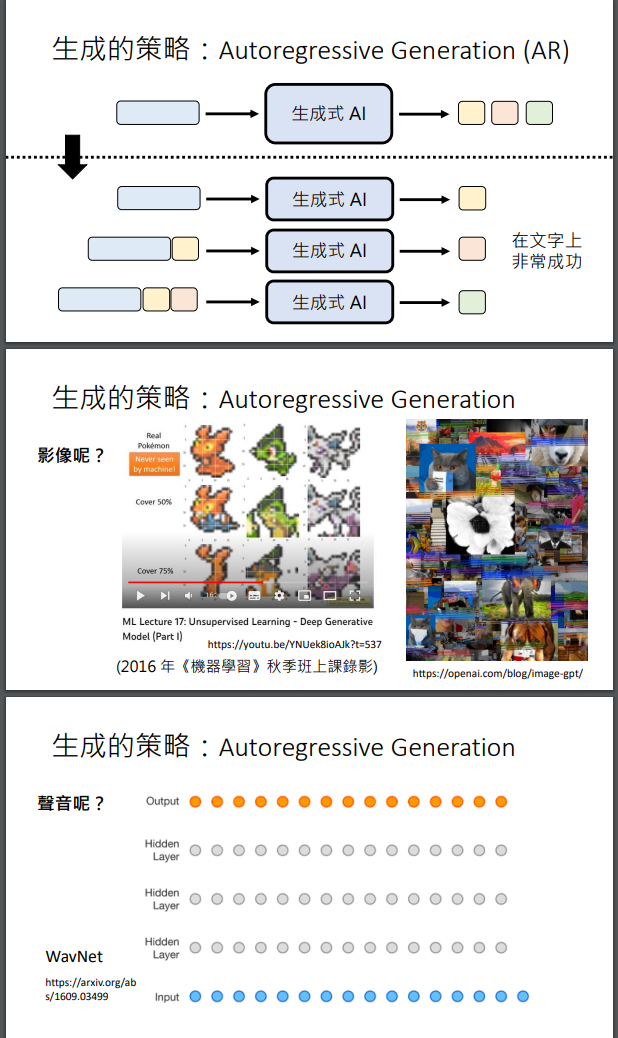

文字就是一个个token生成，图像是一个个像素生成，声音是一个个采样点生成。

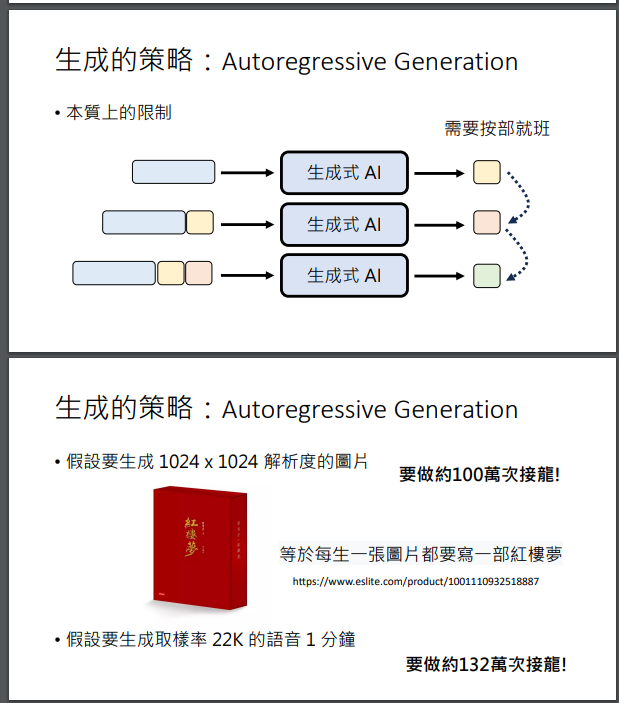
这也引入一个问题，那就是图片和语音要的数据点太多

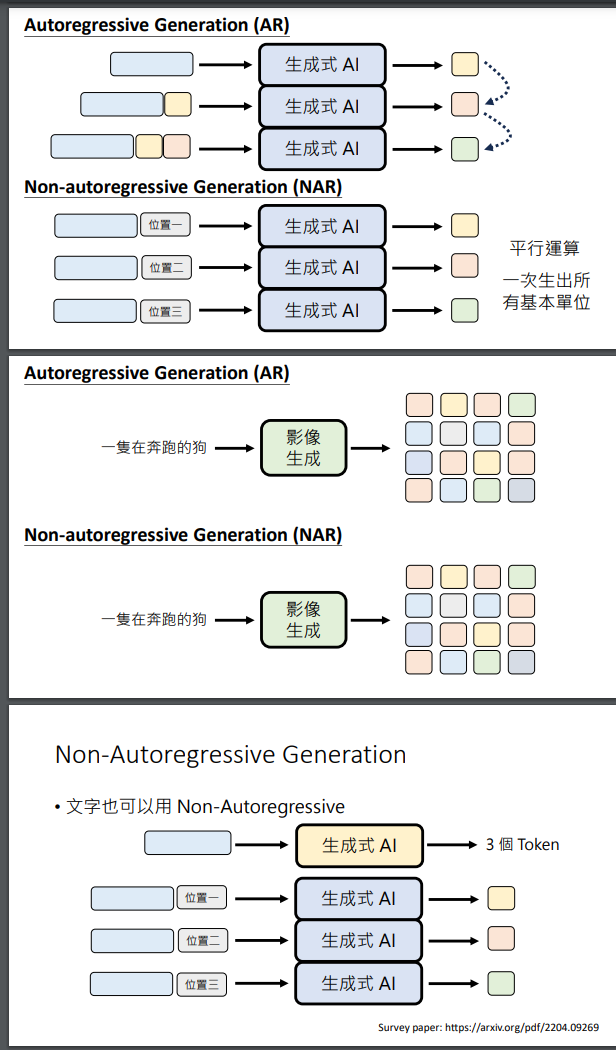

一般来说我们用AR是自回归模型，是一个个逐个生成的。为了提高速度可以使用NAR非自回归模型，这样是一次性输出所有结果

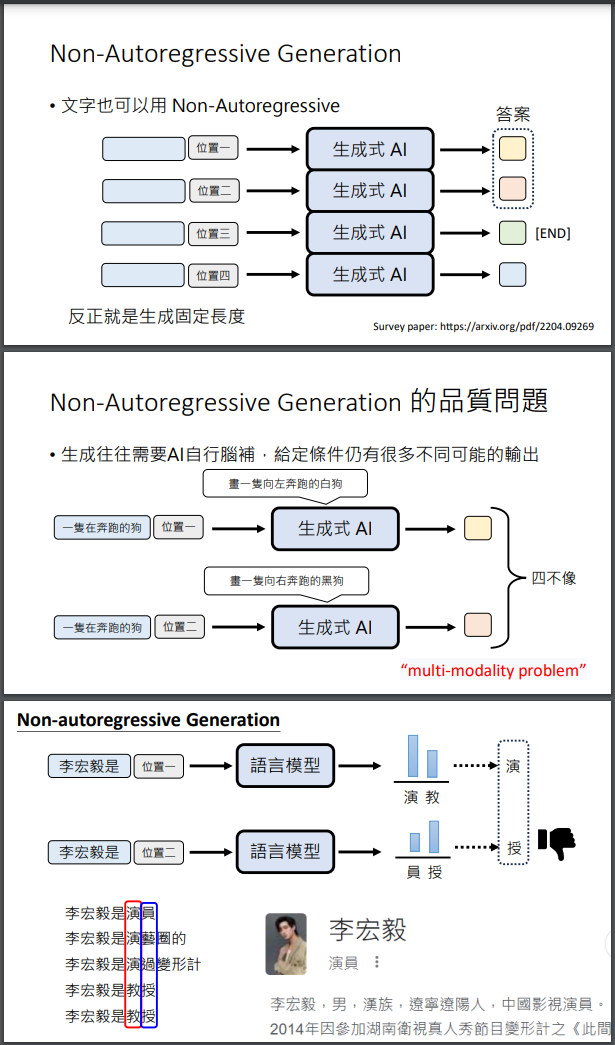

NAR有两种输出方式 一个是预测出要输出几个token，然后一次性输出对应的token数目。还有一个是一次性输入足够长的固定长度，然后找到end，end之后的全部忽略。

但是NAR得准确率有问题，比如生成图片，有些像素要白狗 有些要黑狗，最终四不像。或者各个不同输出的位置文字不同，最终变成“演授”

## 对NAR的改进
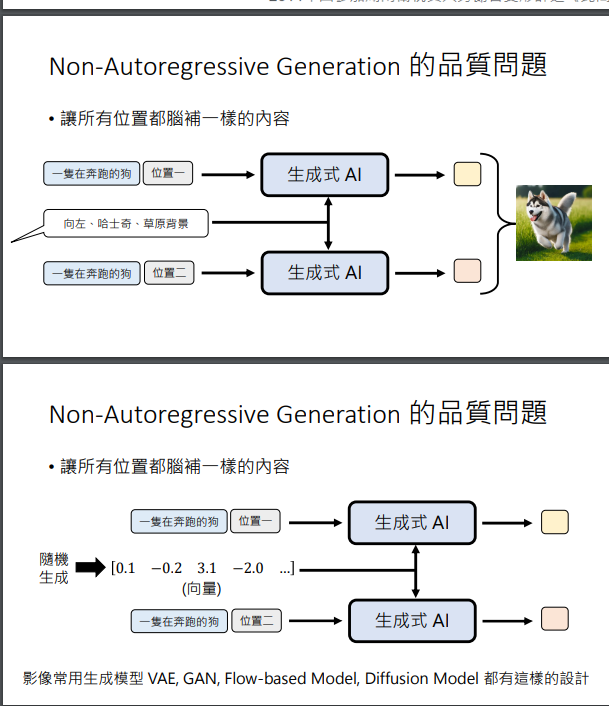
好的prompt 确定图片生成的方向

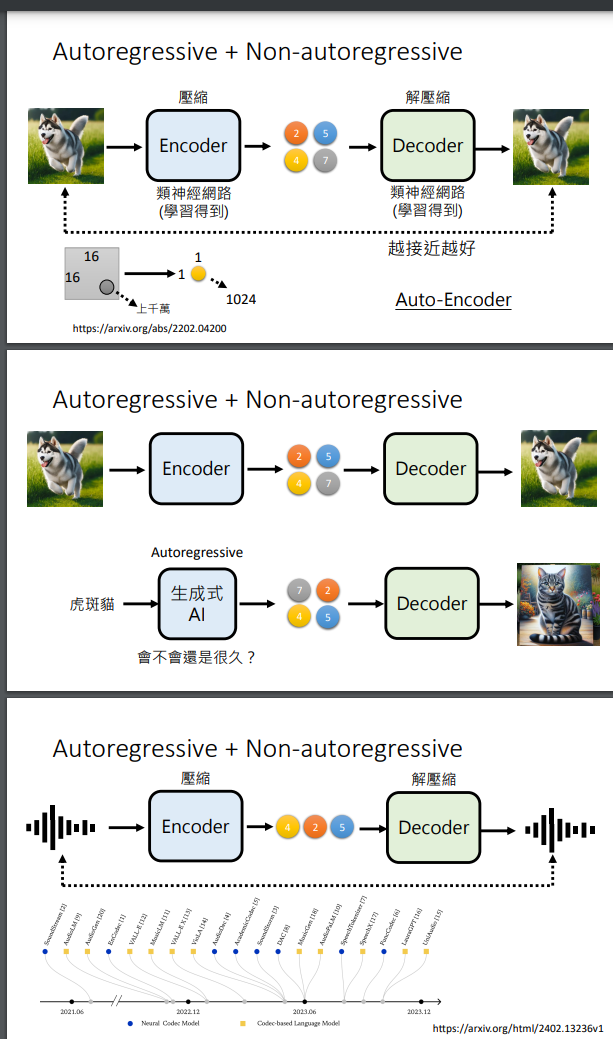
AR+NAR  先AR得到一个压缩后的图片/语音（这个不需要人能看懂 机器能看懂就行，比较小，所以AR生成快），定下基调。 之后通过对压缩以后的信息通过NAR解压缩即可。encoder可以自己训练 也可以直接用生成式AI

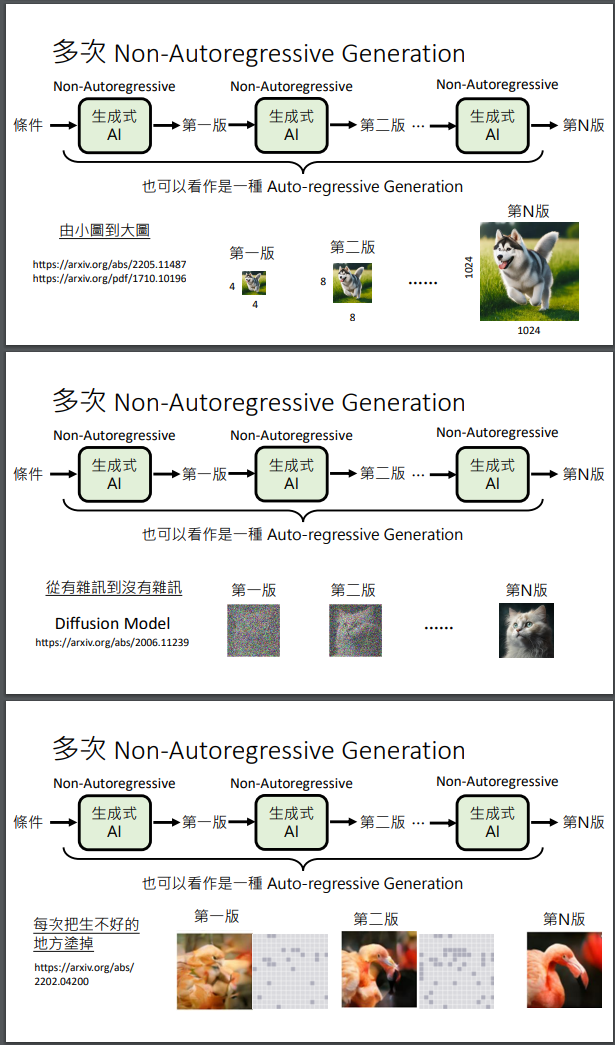
多次NAR，可以看做是AR的变种，只是AR是一个个信息点输出，而多次NAR是一块块信息块输出。

常见的有小图逐渐变大，diffusion model 逐个降噪， 将不对的地方涂抹掉重新生成（哪里不对会用分类器自动分类）

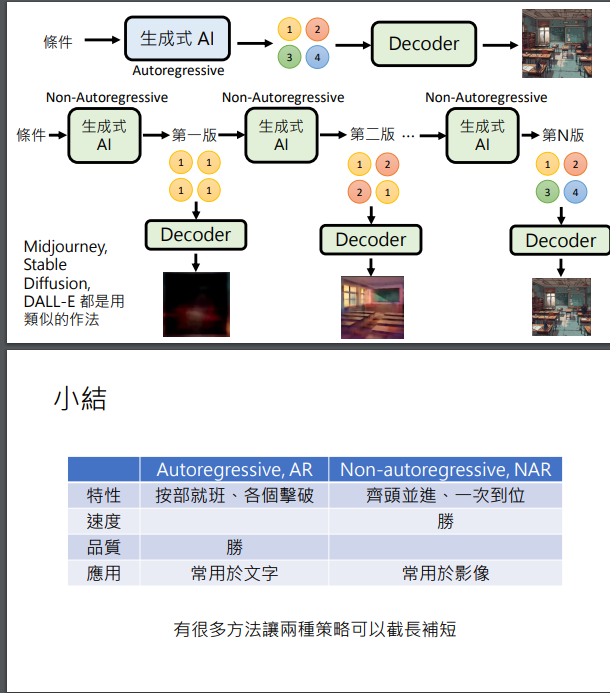

现在常用的方法就是多次NAR来模拟AR（patch 接龙），最后再用decoder（NAR）生成。也就是前两者方法结合

## 对语言模型速度的改进-----speculative decoding

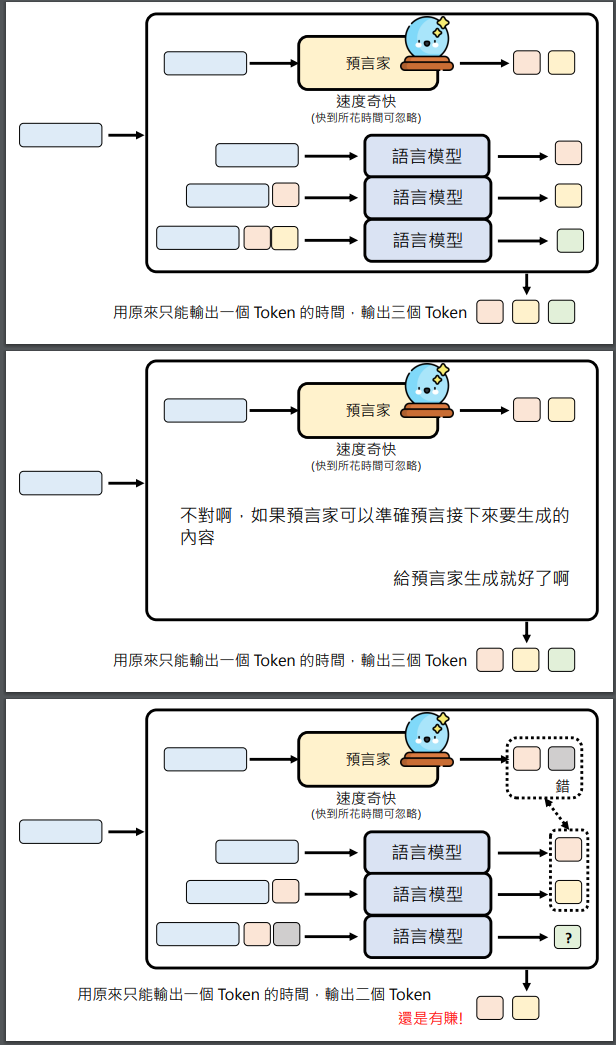
训练一个预言家，一般是一个NAR或者压缩过的小的大模型甚至是一个搜索引擎。能够极速的得到未来的几个输出，然后同时将这些输出输入语音模型中，这样就有可能同时得到多个token得到加速。

但是预言家有可能是错的，这时候就对比真实输出和预言家输出，不输出有错误输入的错误输入就可以了，即使全错，也就是原来的语言模型的原速，但是耗费了更多的并行空间（空间换时间）

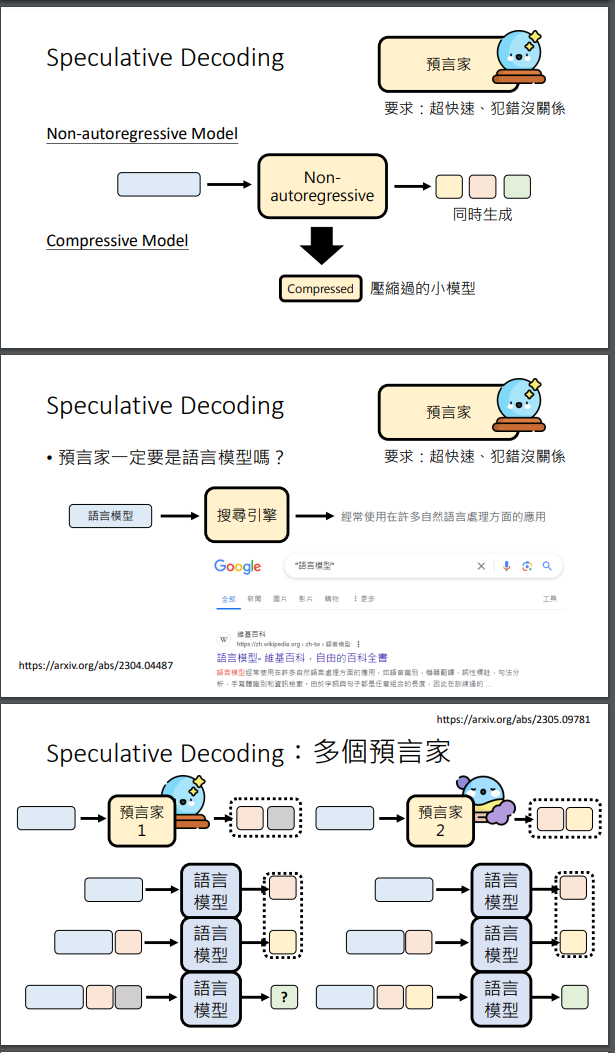

预言家可以是NAR  可以是压缩的AR）（因为压缩了 所以AR输出的变快了 因为模型简化了 但是正确率低了）  甚至是搜索引擎

可以有多个预言家 看哪个对的多 就输出哪一位预言家的输出

## 生成方式

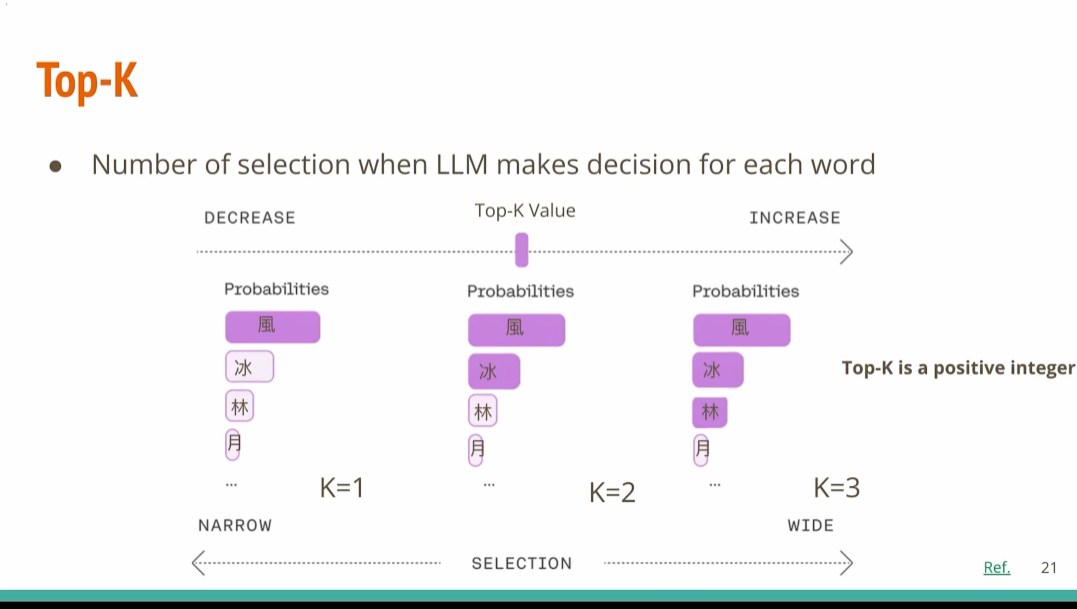
topk 是前k个结果，随机选择其中一个 

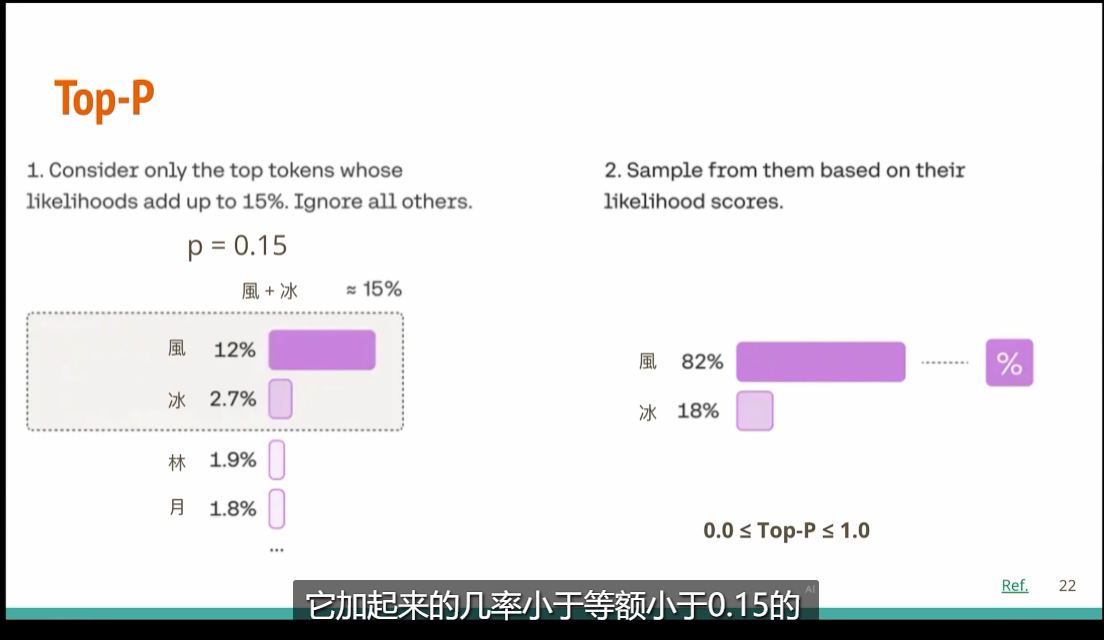
topp 是选择前几个最大的概率 加起来小于p的组合 随机挑选其中一个


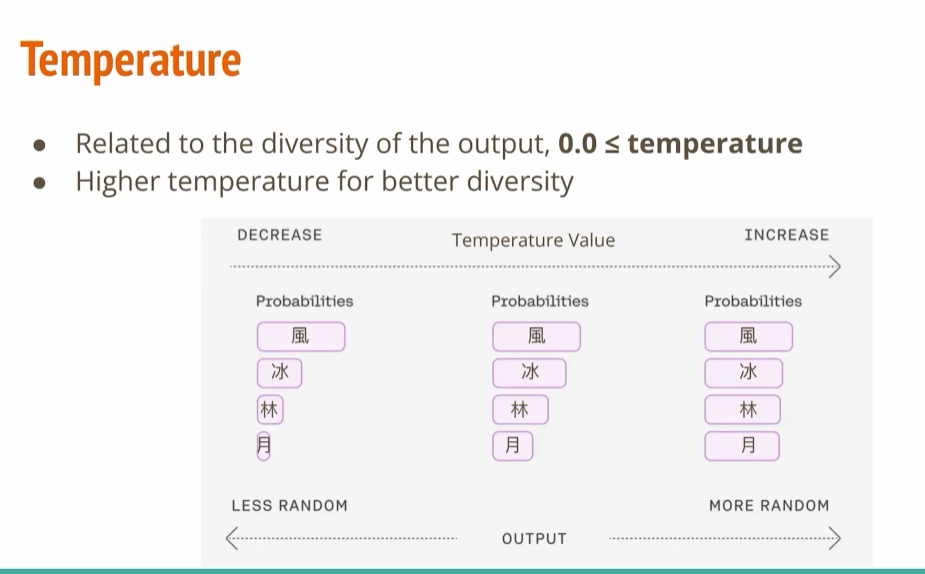
temperature 越大各个概率越均匀 也就越多样 随机性越高

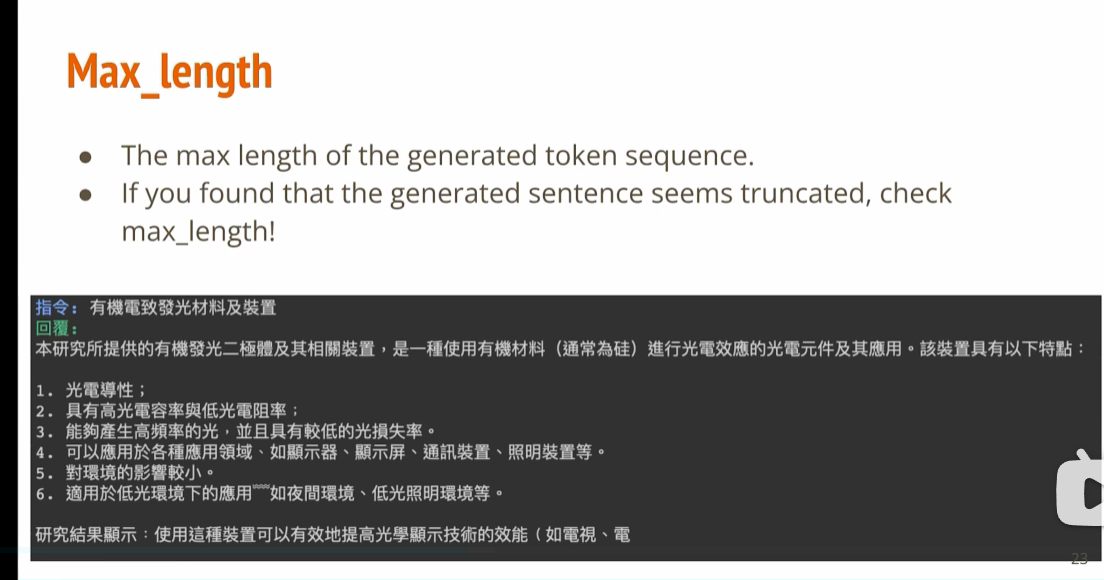
maxlength越大 模型输出内容越多